In [1]:
import pandas as pd
import numpy as np
from pandas import Grouper

In [2]:
df = pd.read_csv("D:/course@ovgu/job/munich_accidents.csv")

In [3]:
df.info

<bound method DataFrame.info of            MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT  \
0      Alkoholunfälle               insgesamt  2022  202201    NaN   
1      Alkoholunfälle               insgesamt  2022  202202    NaN   
2      Alkoholunfälle               insgesamt  2022  202203    NaN   
3      Alkoholunfälle               insgesamt  2022  202204    NaN   
4      Alkoholunfälle               insgesamt  2022  202205    NaN   
...               ...                     ...   ...     ...    ...   
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0   
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0   
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0   
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0   
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0   

      VORJAHRESWERT  VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
0              16.0                       NaN 

In [4]:
df.drop(['VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT'], inplace=True, axis=1)
#df = df.loc[df["MONAT" != 'Summe']

In [5]:
print(df)

df = df.rename(columns={"MONATSZAHL": "Category", "AUSPRAEGUNG": "Type", "JAHR":"Year","MONAT":"Month", "WERT":"value"})
data = df[df['Year'] < 2021]
print (df)

           MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               insgesamt  2022  202202    NaN
2      Alkoholunfälle               insgesamt  2022  202203    NaN
3      Alkoholunfälle               insgesamt  2022  202204    NaN
4      Alkoholunfälle               insgesamt  2022  202205    NaN
...               ...                     ...   ...     ...    ...
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0

[2086 rows x 5 columns]
             Category                    Type  Year   Month  value
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               i

In [6]:
import matplotlib.pyplot as plt

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



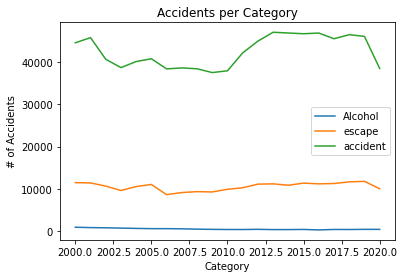

In [52]:
# plot line
Alcohol = data[(
    (df['Category'] == 'Alkoholunfälle') &
    (df['Month'] == 'Summe') &
    (df['Type'] == 'insgesamt')
    )]

escape = data[(
    (df['Category'] == 'Fluchtunfälle') &
    (df['Month'] == 'Summe') &
    (df['Type'] == 'insgesamt')
    )]

accident = data[(
    (df['Category'] == 'Verkehrsunfälle') &
    (df['Month'] == 'Summe') &
    (df['Type'] == 'insgesamt')
    )]
fig, ax = plt.subplots()

plt.plot(Alcohol ['Year'], Alcohol['value'].to_numpy(), label = "line1" )
plt.plot(escape ['Year'], escape['value'].to_numpy(), label  = "line2" )
plt.plot(accident ['Year'], accident['value'].to_numpy(), label = "line3")
plt.legend(['Alcohol','escape','accident'])
plt.title("Accidents by Year")

ax.set_title("Accidents per Category")
ax.set_ylabel ("# of Accidents")
ax.set_xlabel ("Category")

plt.show()